In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime

**Part_2**

###**1. Загрузите в колаб файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы**

In [ ]:
df_ratings = pd.read_csv('u.data.csv', sep='\t', names=['User_ID', 'Film_ID', 'Rating', 'UTC_date'])
df_ratings.head()

,User_ID,Film_ID,Rating,UTC_date
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
column_item = ['Film_ID', 'Film', 'Release_date', 'Video_release_date', 'URL_IMDb', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children_s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'estern']

In [ ]:
df_movies = pd.read_csv('u.item.csv', names=column_item, sep='|', encoding='ISO-8859-1') # usecols=[0,1,2,3,4]
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Film_ID             1682 non-null   int64  
 1   Film                1682 non-null   object 
 2   Release_date        1681 non-null   object 
 3   Video_release_date  0 non-null      float64
 4   URL_IMDb            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children_s          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [ ]:
# Удален столбец Video_release_date т.к пустые дынные и столбец URL_IMDb (для удобства)
df_movies.drop(['Video_release_date', 'URL_IMDb'], axis=1, inplace=True) # df_movies.drop(columns=['Video_release_date', 'URL_IMDb'])
df_movies.head()

,Film_ID,Film,Release_date,unknown,Action,Adventure,Animation,Children_s,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,estern
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


###**2. Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок**

In [ ]:
# Максимальный рейтинг
df_ratings.groupby('User_ID').count()['Rating'].max()

737

In [ ]:
#1 variant (Series)
df_ratings.groupby('User_ID').count()['Rating'].sort_values(ascending=False).head(1) # максимальное число оценок

,Rating
User_ID,
405,737


In [ ]:
#2 variant (DF)
df_ratings_users_top = df_ratings.groupby('User_ID').agg({'Rating': 'count'}).sort_values(by='Rating', ascending=False)
df_ratings_users_top.head(5)

,Rating
User_ID,
405,737
655,685
13,636
450,540
276,518


###**3. Оставьте в датафрейме ratings только те фильмы, который оценил данный пользователь**

In [ ]:
df_user_max = df_ratings.loc[df_ratings['User_ID']==df_ratings_users_top.index[0]]
df_user_max.head()

,User_ID,Film_ID,Rating,UTC_date
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447


###**4. Добавление к датафрейму дополнительных столбцов**

In [ ]:
# Число голосов от всех пользователей
df_count_users_film = df_ratings.groupby(['Film_ID']).count()['Rating'].reset_index()
df_count_users_film.rename(columns={'Rating': 'count_users'}, inplace=True)
df_count_users_film.head()

,Film_ID,count_users
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86


In [ ]:
# суммарная оценка фильмов от всех пользователей
df_rating_sum = df_ratings.groupby('Film_ID').sum()['Rating'].reset_index()
df_rating_sum.rename(columns={'Rating': 'rating_sum'}, inplace=True)
df_rating_sum.head()

,Film_ID,rating_sum
0,1,1753
1,2,420
2,3,273
3,4,742
4,5,284


In [ ]:
df_full = df_user_max.merge(right=df_count_users_film, how='inner', left_on='Film_ID', right_on='Film_ID') # присоединяем количество оценок всех пользователей по каждому фильму, который оценивал пользователь поставивший больше всего оценок
df_full = df_full.merge(right=df_rating_sum, how='inner', left_on='Film_ID', right_on='Film_ID') # присоединяем суммы всех оценок всех пользователей по каждому фильму, который оценивал пользователь поставивший больше всего оценок
df_full = df_full.merge(right=df_movies, how='inner', on='Film_ID')  # присоединяем жанры фильмов
df_full

,User_ID,Film_ID,Rating,UTC_date,count_users,rating_sum,Film,Release_date,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,estern
0,405,56,4,885544911,394,1600,Pulp Fiction (1994),01-Jan-1994,0,0,...,0,0,0,0,0,0,0,0,0,0
1,405,592,1,885548670,9,30,True Crime (1995),01-Jan-1995,0,0,...,0,0,0,0,1,0,0,1,0,0
2,405,1582,1,885548670,1,1,T-Men (1947),01-Jan-1947,0,0,...,0,1,0,0,0,0,0,0,0,0
3,405,171,1,885549544,65,252,Delicatessen (1991),01-Jan-1991,0,0,...,0,0,0,0,0,0,1,0,0,0
4,405,580,1,885547447,32,108,"Englishman Who Went Up a Hill, But Came Down a...",01-Jan-1995,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,405,375,1,885546835,23,45,Showgirls (1995),01-Jan-1995,0,0,...,0,0,0,0,0,0,0,0,0,0
733,405,445,4,885548435,22,77,"Body Snatcher, The (1945)",01-Jan-1945,0,0,...,0,0,1,0,0,0,0,0,0,0
734,405,1246,1,885547735,7,11,Bushwhacked (1995),01-Jan-1995,0,0,...,0,0,0,0,0,0,0,0,0,0
735,405,196,1,885546112,251,983,Dead Poets Society (1989),01-Jan-1989,0,0,...,0,0,0,0,0,0,0,0,0,0


ПОДГОТОВКА

In [ ]:
# Конвертация даты
df_full['Release_date'] = df_full['Release_date'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y').year)

In [ ]:
#  Суммирование по столбцам с жанрами
df_full['sum_genres'] = df_full.apply(lambda row: row['unknown': 'estern'].sum(), axis=1)

In [ ]:
qw = df_full.apply(lambda row: row['unknown': 'estern'].sum(), axis=1)

In [ ]:
df_full.head(5)

,User_ID,Film_ID,Rating,UTC_date,count_users,rating_sum,Film,Release_date,unknown,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,estern,sum_genres
0,405,56,4,885544911,394,1600,Pulp Fiction (1994),1994,0,0,...,0,0,0,0,0,0,0,0,0,2
1,405,592,1,885548670,9,30,True Crime (1995),1995,0,0,...,0,0,0,1,0,0,1,0,0,2
2,405,1582,1,885548670,1,1,T-Men (1947),1947,0,0,...,1,0,0,0,0,0,0,0,0,1
3,405,171,1,885549544,65,252,Delicatessen (1991),1991,0,0,...,0,0,0,0,0,1,0,0,0,2
4,405,580,1,885547447,32,108,"Englishman Who Went Up a Hill, But Came Down a...",1995,0,0,...,0,0,0,0,1,0,0,0,0,2


In [ ]:
# Пропусков НЕТ!
print(df_full.isnull().sum())

User_ID         0
Film_ID         0
Rating          0
UTC_date        0
count_users     0
rating_sum      0
Film            0
Release_date    0
unknown         0
Action          0
Adventure       0
Animation       0
Children_s      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
estern          0
sum_genres      0
dtype: int64


###**5. Формирование X_train, X_test, y_train, y_test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# - count_users - количество оценок от всех пользователей
# - rating_sum - сумма оценок от всех пользователей
# - Release_date - год выпуска фильма
# - Жанры
X = df_full[['count_users', 'rating_sum', 'Release_date', 'sum_genres']]

In [ ]:
X.corr(method='spearman') # Пирсон по умолчании

,count_users,rating_sum,Release_date,sum_genres
count_users,1.000000,0.995626,-0.333015,0.394374
rating_sum,0.995626,1.000000,-0.345893,0.380645
Release_date,-0.333015,-0.345893,1.000000,-0.106100
sum_genres,0.394374,0.380645,-0.106100,1.000000


In [ ]:
y = df_full['Rating']

In [ ]:
X.head(3)

,count_users,rating_sum,Release_date,sum_genres
0,394,1600,1994,2
1,9,30,1995,2
2,1,1,1947,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1982)

###**6. Mодель линейной регрессии и обучение**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ml_movies = LinearRegression()

In [ ]:
ml_movies.fit(x_train, y_train)

LinearRegression()

###**7. Оценка качество модели на X_test, y_test при помощи метрик для задачи регрессии**

In [ ]:
ml_movies.coef_ # коэффициенты (b) модели регрессии.

array([ 0.01579115, -0.00184963, -0.0083202 , -0.05130498])

In [ ]:
ml_movies.intercept_ # свободный член(пересечение)

17.812971420485763

In [ ]:
# Формула ПРОГНОЗА:
# Y = ('count_users' * 0.01579115) + ('rating_sum' * -0.00184963) +	('Release_date' * -0.0083202) +	('sum_genres' * -0.05130498) + 17.812971420485763

In [ ]:
import sklearn.metrics as metrics

In [ ]:
# Оценка модели на выборке на которой обучалась
y_predict_train = ml_movies.predict(x_train)
MSE_train = metrics.mean_squared_error(y_train, y_predict_train)
MSE_train

1.3281228991870262

In [ ]:
# Предсказание оценок тестовой выборки
y_predict_test = ml_movies.predict(x_test)
y_predict_test[:5]

array([1.23505146, 2.2425419 , 1.88541671, 1.22972614, 1.49133781])

In [ ]:
# Определение среднего значения квадратов разностей между настоящими оценками тестовой выборки и полученными оценками от модели
MSE = metrics.mean_squared_error(y_test, y_predict_test)
R = metrics.r2_score(y_test, y_predict_test)
MAE = metrics.mean_absolute_error(y_test, y_predict_test)
print(f'Коэффициент детерминации: {R}')
print(f'Cредняя квадратичная ошибка модели - {MSE}')
print(f'RMSE - {math.sqrt(MSE)}')
print(f'Средняя абсолютная ошибка: {MAE}')

Коэффициент детерминации: 0.4030445632608376
Cредняя квадратичная ошибка модели - 0.9378119765171344
RMSE - 0.9684069271319441
Средняя абсолютная ошибка: 0.701040556811004


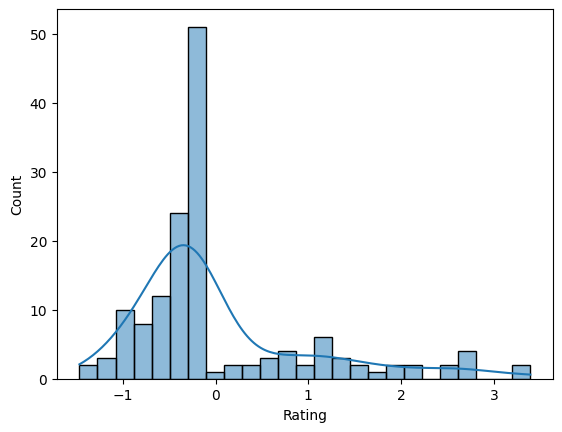

In [ ]:
# График остатков
sns.histplot(y_test - y_predict_test, kde=True);
#Распределение явно ненормальное. Это нехорошо
#МОДЕЛЬ ПРОГНОЗИРУЕТ В БОЛЬШУЮ СТОРОНУ, ЗАВЫШАЕТ ОЦЕНКУ(((

**МОДЕЛЬ: Ridge**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ml_Ridge = Ridge()

In [ ]:
ml_Ridge.fit(x_train, y_train)

Ridge()

In [ ]:
MSE_ridge = metrics.mean_squared_error(y_test, ml_Ridge.predict(x_test))
print(f'MSE_ridge - {MSE_ridge}')
print(f'R2 - {metrics.r2_score(y_test, ml_Ridge.predict(x_test))}')

MSE_ridge - 0.937806080540837
R2 - 0.40304831628936977


###**РАБОТА в SPARK**

###**8. Загрузить данные в spark**

In [ ]:
!pip install pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

spark

In [ ]:
df_spark_ratings = spark.read.csv('u.data.csv', sep='\t', inferSchema=True, header=False)
df_spark_ratings.show(3)

+---+---+---+---------+
|_c0|_c1|_c2|      _c3|
+---+---+---+---------+
|196|242|  3|881250949|
|186|302|  3|891717742|
| 22|377|  1|878887116|
+---+---+---+---------+
only showing top 3 rows



In [ ]:
df_spark_ratings.columns

['_c0', '_c1', '_c2', '_c3']

In [ ]:
df_spark_ratings=df_spark_ratings.selectExpr('_c0 as User_ID', '_c1 as Film_ID', '_c2 as Rating', '_c3 as UTC_date')

In [ ]:
df_spark_ratings.show(3)

+-------+-------+------+---------+
|User_ID|Film_ID|Rating| UTC_date|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
+-------+-------+------+---------+
only showing top 3 rows



In [ ]:
# Для возможности работы с таблицей как в SQL
df_spark_ratings.createOrReplaceTempView('Table_ratings')

In [ ]:
column_item = ['Film_ID', 'Film', 'Release_date', 'Video_release_date', 'URL_IMDb', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children_s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'estern']

In [ ]:
df_spark_movies = spark.read.csv('u.item.csv', sep='|', header=False, inferSchema=True)
df_spark_movies.show(3)

+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|              _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1| Toy Story (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2| GoldenEye (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|Four Rooms (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+--

In [ ]:
df_spark_movies = df_spark_movies.drop('_c3', '_c4')
df_spark_movies.show(3)

+---+-----------------+-----------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|              _c1|        _c2|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+-----------------+-----------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1| Toy Story (1995)|01-Jan-1995|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2| GoldenEye (1995)|01-Jan-1995|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|Four Rooms (1995)|01-Jan-1995|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
+---+-----------------+-----------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
only showing top 3 rows



In [ ]:
# Для возможности работы с таблицей как в SQL
df_spark_movies.createOrReplaceTempView('Table_movies')

In [ ]:
df_spark_movies = spark.sql('select _c0 as Film_ID, _c1 as Film, _c2 as Release_date, _c5, _c6, _c7, _c8, _c9, _c10, _c11, _c12, _c13, _c14, _c15, _c16, _c17, _c18, _c19, _c20, _c21, _c22, _c23  from Table_movies')
df_spark_movies.show(3)

+-------+-----------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Film_ID|             Film|Release_date|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+-------+-----------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|      1| Toy Story (1995)| 01-Jan-1995|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|      2| GoldenEye (1995)| 01-Jan-1995|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|      3|Four Rooms (1995)| 01-Jan-1995|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
+-------+-----------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
only showing top 3 rows



###**9. Средствами спарка вывести среднюю оценку для каждого фильма**

In [ ]:
df_spark_ratings.groupby('Film_ID').mean('Rating').show(10)

+-------+------------------+
|Film_ID|       avg(Rating)|
+-------+------------------+
|    496| 4.121212121212121|
|    471|3.6108597285067874|
|    463| 3.859154929577465|
|    148|          3.203125|
|   1342|               2.5|
|    833| 3.204081632653061|
|   1088| 2.230769230769231|
|   1591|3.1666666666666665|
|   1238|             3.125|
|   1580|               1.0|
+-------+------------------+
only showing top 10 rows



###**10. Посчитайте средствами спарка среднюю оценку для каждого жанра**

In [ ]:
# РЕШЕНИЕ ПОЛУЧИЛОСЬ ТОЛЬКО ЧЕРЕЗ PANDAS
genre = ['unknown', 'Action', 'Adventure', 'Animation',
              'Children_s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'estern']
df_genre = df_ratings.merge(right=df_movies, on='Film_ID', how='inner')
df_genre = df_genre.drop(['User_ID', 'UTC_date', 'Film', 'Release_date'], axis=1)

df_genre.head(1)

# ЧЕРЕЗ СПИСКИ

list_mean = []
list_genre = []
for i in genre:
  mean_genre1 = df_genre.loc[df_genre[i]==1]['Rating'].mean()
  list_mean.append(round(mean_genre1, 2))
  list_genre.append(i)
data = tuple(zip(list_genre, list_mean))

df_mean_genre = pd.DataFrame(data, columns=['genre', 'mean'])
df_mean_genre.sort_values(by='mean', ascending=False)

,genre,mean
10,Film-Noir,3.92
17,War,3.82
8,Drama,3.69
7,Documentary,3.67
13,Mystery,3.64
6,Crime,3.63
14,Romance,3.62
18,estern,3.61
3,Animation,3.58
15,Sci-Fi,3.56


In [ ]:
#ЧЕРЕЗ СЛОВАРЬ

dict_mean_genre = {}
for i in genre:
  mean_genre = df_genre.loc[df_genre[i]==1]['Rating'].mean()
  dict_mean_genre.setdefault(i, round(mean_genre, 2))   # dict_mean_genre.update(i: mean_genre)

dict_mean_genre
df_mean_genre_var2 = pd.DataFrame([dict_mean_genre])
df_mean_genre_var2 = df_mean_genre_var2.transpose()
df_mean_genre_var2.rename(columns={0: 'MEAN'}, inplace=True)
df_mean_genre_var2.sort_values(by='MEAN')

,MEAN
unknown,3.20
Fantasy,3.22
Horror,3.29
Children_s,3.35
Comedy,3.39
Action,3.48
Adventure,3.50
Thriller,3.51
Musical,3.52
Sci-Fi,3.56


SPARK???

СРЕДСТВАМИ SPARK НЕ МОГУ СООБРАЗИТЬ/НЕ ПОЛУЧАЕТСЯ КАК ЭТО СДЕЛАТЬ(((

In [ ]:
df_spark_ratings.show(1)

+-------+-------+------+---------+
|User_ID|Film_ID|Rating| UTC_date|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
+-------+-------+------+---------+
only showing top 1 row



In [ ]:
df_spark_movies.show(1)

+-------+----------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Film_ID|            Film|Release_date|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+-------+----------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|      1|Toy Story (1995)| 01-Jan-1995|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
+-------+----------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
only showing top 1 row



In [ ]:
# Соединение таблиц
df_ratings_genres = df_spark_ratings.join(df_spark_movies, df_spark_ratings.Film_ID==df_spark_movies.Film_ID, how='inner')

In [ ]:
df_ratings_genres.show(3)

+-------+-------+------+---------+-------+--------------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|User_ID|Film_ID|Rating| UTC_date|Film_ID|                Film|Release_date|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+-------+-------+------+---------+-------+--------------------+------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|    196|    242|     3|881250949|    242|        Kolya (1996)| 24-Jan-1997|  0|  0|  0|  0|  0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|    186|    302|     3|891717742|    302|L.A. Confidential...| 01-Jan-1997|  0|  0|  0|  0|  0|   0|   1|   0|   0|   0|   1|   0|   0|   1|   0|   0|   1|   0|   0|
|     22|    377|     1|878887116|    377| Heavyweights (1994)| 01-Jan-1994|  0|  0|  0|  0|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0

###**11. В спарке получить 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами (по количеству оценок, либо по самой оценке - на Ваш выбор)**

In [ ]:
# ТОП 5 самых популярных фильмов по количеству оценок
df_spark_ratings.groupby('Film_ID').count().sort('count', ascending=False).show(5)

+-------+-----+
|Film_ID|count|
+-------+-----+
|     50|  583|
|    258|  509|
|    100|  508|
|    181|  507|
|    294|  485|
+-------+-----+
only showing top 5 rows



In [ ]:
# самые непопулярные фильмы
df_spark_ratings.groupby('Film_ID').count().sort('count', ascending=True).show()

+-------+-----+
|Film_ID|count|
+-------+-----+
|   1352|    1|
|   1525|    1|
|   1580|    1|
|   1645|    1|
|   1507|    1|
|   1460|    1|
|   1339|    1|
|   1650|    1|
|   1618|    1|
|    857|    1|
|   1533|    1|
|   1653|    1|
|   1561|    1|
|   1493|    1|
|   1675|    1|
|    830|    1|
|   1201|    1|
|   1510|    1|
|   1621|    1|
|   1156|    1|
+-------+-----+
only showing top 20 rows

